# Самостоятельный проект по теме «Принятие решений в бизнесе»

# Вступление

В этом проекте я выступлю в роли аналитика крупного интернет-магазина, в котором вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. В ходе исследования мы будем приоритизировать гипотезы, запустим A/B-тест и проанализируем результаты. Анализ результатов подробно распишем в выводах.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
pd.options.display.max_colwidth=300


# Часть 1. Приоритизация гипотез.

In [2]:
# считаем файл с гипотезами в переменную hypothesis
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')

# выведем на экран получившуюся таблицу
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В таблице hypothesis у нас содержится 9 различных гипотез. Применим фреймворки ICE и RICE, отсортируем результаты и обратим внимание на то, как меняются (и меняются ли) позиции гипотез в отсортированных по приоритетности гипотез списках в случае применения разных фреймворках. Предположим, с чем это может быть связано. Вспомним две формулы:


ICE SCORE = (Impact * Confidence) / Efforts

RICE SCORE = (Reach * Impact * Confidence) / Efforts

In [3]:
# результаты вычислений значений по формуле ICE SCORE округлим до двух знаков после запятой
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'], 2)

In [4]:
# выведем на экран гипотезы в порядке убывания их приоритетов, полученных в ходе работы фреймворка ICE
print(hypothesis[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False))

                                                                                                     Hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

In [5]:
# результаты вычислений значений по формуле RICE SCORE округлим до двух знаков после запятой
hypothesis['RICE'] = round((hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'], 2)

In [6]:
# выведем на экран гипотезы в порядке убывания их приоритетов, полученных в ходе работы фреймворка RICE
print(hypothesis[['Hypothesis', 'RICE']].sort_values('RICE', ascending=False))

                                                                                                     Hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Наиболее перспективные гипотезы по ICE: 8, 0, 7 и 6, а наиболее перспективные гипотезы по RICE: 7, 2, 0 и 6. Седьмая гипотеза в случае применения фреймворка RICE «вырвалась» вперёд, на первое место с третьего, за счёт того, что параметр Reach имеет значение 10, то есть максимальное значение шкалы, по которой мы оцениваем параметры гипотез. Это означает, что такая гипотеза охватит всю аудиторию. В лидерах как ICE, так и RICE присутствует гипотеза 0 — у неё максимальный показатель параметра Impact, то есть мы уверены в том, что данная гипотеза будем иметь максимальную степень влияния на пользователей, которых она затронет. Также у гипотезы 0 можно отметить довольно высокий (8) показатель параметра Confidence. Это говорит о том, что мы имеем очень серьёзные основания быть уверенными в выставленных значениях параметров Impact, Reach и Efforts. Точно так же в обоих списках лидеров на четвёртом месте у нас оказалась шестая гипотеза. Тут показатели Impact и Efforts компенсируют друг друга (они одинаковые, при этом не сильно большие, что в случае с параметром Efforts нам только на руку, и можно в такой дроби их сократить), а произведение значений параметров Reach и Confidence в случае с фреймворком RICE или просто само значение Confidence в случае с фреймворком ICE — довольно высокое значение.

В результате приоритизации гипотез оставим гипотезы 7, 0 и 6. Именно их мы будем тестировать в дальнейшем, так как в случае применения фреймворков ICE и RICE они имеют максимальные показатели.

# Часть 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые считаем в переменные orders и visitors. Пришло время проанализировать A/B-тест.

In [7]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

In [8]:
# ознакомимся с первыми пятью строками таблицы orders
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
# ознакомимся с первыми пятью строками таблицы visitors
display(visitors.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
# убедимся, что таблица orders не содержит пропусков, а типы данных соответствуют ожидаемым
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
# убедимся, что таблица visitors не содержит пропусков, а типы данных соответствуют ожидаемым
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
# изменим тип данных в столбцах 'date' обоих таблиц на тип datetime

for i in [orders, visitors]:
    i['date'] = i['date'].map(
        lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
    )

In [13]:
# Для удобства поправим имена столбцов в таблице orders на более короткие
orders = orders.rename(
    columns={'transactionId':'orderId', 'visitorId':'userId'}
)

In [14]:
# убедимся в отсутствии грубых дубликатов в таблице orders
orders.duplicated().sum()

0

In [15]:
# убедимся в отсутствии грубых дубликатов в таблице visitors
visitors.duplicated().sum()

0

Теперь убедимся, что в наших данных нет пользователей, которые случайно попали и в группу A и в группу B. Если найдём таких, то исключим их из датафрейма, чтобы они не искажали истинные данные.

In [16]:
intersection_users = []

for i in list(orders[orders['group'] == 'A']['userId']):
    for j in list(orders[orders['group'] == 'B']['userId']):
        if i == j and i not in intersection_users:
            intersection_users.append(i)
            
len(intersection_users)

58

Всего уникальных пользователей, которые попали в обе группы — 58. Избавимся от этих пользователей.


In [17]:
orders = orders.query('userId not in @intersection_users')

# 2.1 График кумулятивной выручки по группам

Сперва подготовим данные и начнём с создания датафрейма с уникальными парами значений 'date' и 'group'

In [18]:
# создаём датафрейм с уникальными парами значений 'date' и 'group'
datesGroups = orders[['date', 'group']].drop_duplicates()

In [19]:
# Далее объявим переменную ordersAggregated, которая примет таблицу с полями даты, группы A/B-теста, числом уникальных заказов
# в группе теста по указанную дату включительно, числом уникальных пользователей, совершивших хотя бы 1 заказ в группе теста 
# по указанную дату включительно, суммарной выручкой заказов в группе теста по указанную дату включительно

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [20]:
# Также нам будет нужна переменная visitorsAggregated, которая будет содержать дату,  группу A/B-теста, и количество
# уникальных посетителей в группе теста по указанную дату включительно.

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [21]:
# Объединим две таблицы по колонкам 'date' и 'group' в переменной cumulativeData методом merge()
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [22]:
# выведем на экран первые 5 строк получившейся таблицы
display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Теперь, когда у нас есть таблица cumulativeData, получим из неё данные только для группы A и только для группы B. Сохраним эти данные в переменных cumulativeRevenueA и cumulativeRevenueB и основываясь на этих новых таблицах построим графики кумулятивной выручки по дням в группах.

In [23]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

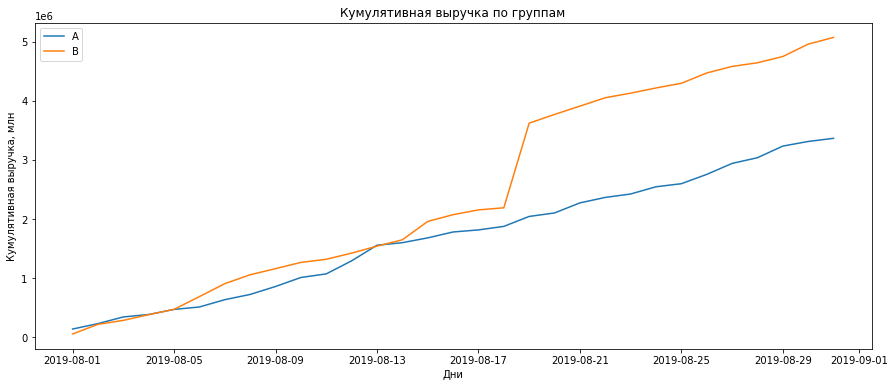

In [24]:
plt.figure(figsize=(15, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дни')
plt.ylabel('Кумулятивная выручка, млн')
plt.show()

По графику мы можем наблюдать, что сегмент B практически в течение всего периода наблюдений (за исключением нескольких дней в начале наблюдений) превосходил по показателям кумулятивной выручки сегмент A. После 18 августа видно, что в значения группы B пришла аномалия, какой то нетипично крупный заказ, из-за которого различие между показателями групп стало существенным. Обязательно вернёмся к теме аномалий, но чуть позже, а пока примем как факт лидерство за показателями кумулятивной выручки группы B.

# 2.2 График кумулятивного среднего чека по группам

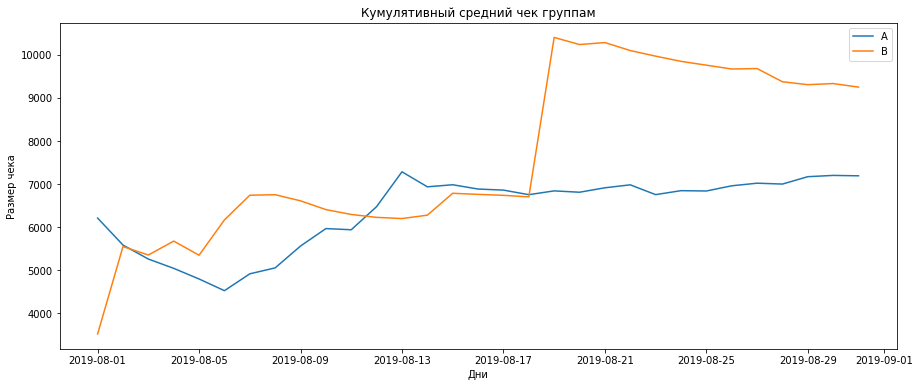

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Кумулятивный средний чек группам')
plt.xlabel('Дни')
plt.ylabel('Размер чека')
plt.show()

На построенных графиках видно, что кумулятивное значение среднего чека между группами A и B колеблется, после 18 августа в группу B пришёл нетипично крупный заказ, что повлекло значительный отрыв показателей среднего чека у группы B. Также мы видим, что после этого отрыва показатели среднего чека группы B пошли на спад. Принимать решение по метрике кумулятивного значения среднего чека однозначно рано, ведь графики не стабильны. К слову, это уже второй график, который подталкивает нас к мысли разобраться с аномалиями, ведь именно они являются причиной колебаний графиков.

# 2.3 График относительного изменения кумулятивного среднего чека группы B к группе A

Для построения графика относительного изменения кумулятивного среднего чека нам будут нужны столбцы 'revenueA', 'revenueB', 'ordersA', 'ordersB', поэтому мы объединим таблицы cumulativeRevenueA и cumulativeRevenueB методом merge() и задействуем при этом объединении параметр suffixes, чтобы получить в одном датасете такие столбцы. На графике проведём пунктирную линию по оси X в значении y=0, она будет являться границей: так как мы изучаем относительное изменение группы B к группе A, то значения выше этой пунктирной линии будут сигнализировать о том, что показатели кумулятивного среднего чека группы B выше аналогичных показателей группы A. 

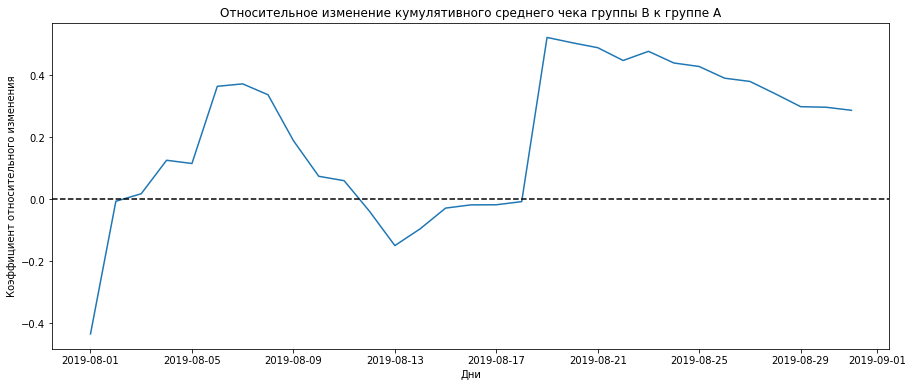

In [26]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']) - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дни')
plt.ylabel('Коэффициент относительного изменения')
plt.show()

На графике относительного различия в среднем чеке между группами видно, что результаты теста значительно и резко менялись в несколько дат: в районе 6 августа, 13 августа и 18 августа график выраженно менял своё направление. Видимо, точки перелома графика и есть даты, в которые были совершены аномальные заказы. 

# 2.4 График кумулятивного среднего количества заказов по группам

In [27]:
# Добавим таблицам столбцы 'daily_orders' с кумулятивным средним количеством заказов по группам 
# Так как тест проводился в рамках одного месяца с 1 по 31-е число в качестве знаменателя в рассчёте кумулятивного среднего
# можем использовать число с номером дня месяца

cumulativeRevenueA['daily_orders'] = round(cumulativeRevenueA['orders'] / pd.to_datetime(cumulativeRevenueA['date']).dt.day, 2)
cumulativeRevenueB['daily_orders'] = round(cumulativeRevenueB['orders'] / pd.to_datetime(cumulativeRevenueB['date']).dt.day, 2)

# Убедимся, что столбцы добавлены успешно
display(cumulativeRevenueA.head())

,date,revenue,orders,daily_orders
0,2019-08-01,142779,23,23.00
2,2019-08-02,234381,42,21.00
4,2019-08-03,346854,66,22.00
6,2019-08-04,388030,77,19.25
8,2019-08-05,474413,99,19.80


In [28]:
display(cumulativeRevenueB.head())

,date,revenue,orders,daily_orders
1,2019-08-01,59758,17,17.0
3,2019-08-02,221801,40,20.0
5,2019-08-03,288850,54,18.0
7,2019-08-04,385740,68,17.0
9,2019-08-05,475648,89,17.8


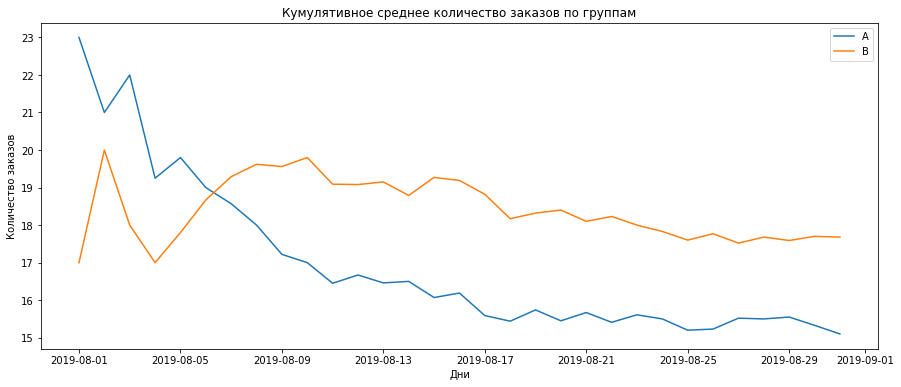

In [29]:
plt.figure(figsize=(15, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['daily_orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['daily_orders'], label='B')
plt.legend()
plt.title('Кумулятивное среднее количество заказов по группам')
plt.xlabel('Дни')
plt.ylabel('Количество заказов')
plt.show()

На протяжение всего графика мы можем наблюдать, что кумулятивное среднее количество заказов в обеих группах подвержено сильным колебаниям, особенно в первые две недели. Это может говорить о том, что в начале наблюдений во-первых у нас было малое количество данных и любое число заказов вносило свой эффект на координаты изучаемой метрики на графике, то есть мы видим Закон Больших Чисел в действии, и во-вторых — что в группе A по началу действительно заказывали больше, чем в группе B. Примерно после 6 августа среднее кумулятивное число заказов в группе B в среднем стало опережать число заказов в группе A, и примерно через три недели линии графиков стабилизируются.

# 2.5 График относительного изменения кумулятивного среднего количества заказов группы B к группе A

In [30]:
mergedCumulativeAverageOrders = cumulativeRevenueA[['date', 'daily_orders']].merge(cumulativeRevenueB[['date', 'daily_orders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# убедимся, что таблица соответствует ожиданиям
display(mergedCumulativeAverageOrders.head())

,date,daily_ordersA,daily_ordersB
0,2019-08-01,23.00,17.0
1,2019-08-02,21.00,20.0
2,2019-08-03,22.00,18.0
3,2019-08-04,19.25,17.0
4,2019-08-05,19.80,17.8


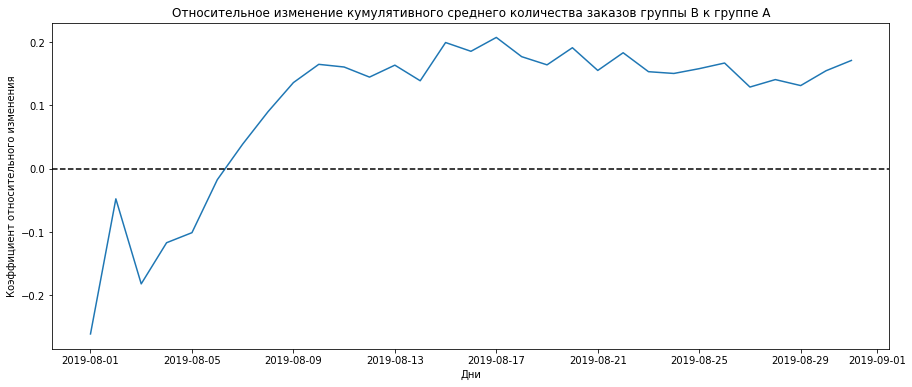

In [31]:
plt.figure(figsize=(15, 6))
plt.plot(mergedCumulativeAverageOrders['date'], (mergedCumulativeAverageOrders['daily_ordersB']/mergedCumulativeAverageOrders['daily_ordersA']) - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего количества заказов группы B к группе A')
plt.xlabel('Дни')
plt.ylabel('Коэффициент относительного изменения')
plt.show()

И действительно, до 6 августа значение кумулятивного среднего количества заказов группы B в основном (кроме одного дня) не превосходило аналогичного значения группы A. Затем в данные, вероятно, ворвалась аномалия и различия стали существенны: мы можем наблюдать резкий рост различий с 6 по 10-е августа и их дальнейшие, менее значительные колебания. Говорить о том, что график относительного изменения кумулятивного среднего количества заказов группы B к группе A стабилизировался, мы не можем.

# 2.6 Точечный график количества заказов по пользователям

In [32]:
# Вернёмся к таблице orders

display(orders.head())

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [33]:
# Найдём число заказов по пользователям и сохраним его в датафрейме ordersByUsers
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId':'nunique'})
)

# Переименуем столбцы
ordersByUsers.columns=['userId', 'orders']
# Посмотрим на первые 10 строк таблицы, отсортированной по убыванию числа заказов
display(ordersByUsers.sort_values('orders', ascending=False).head(10))

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


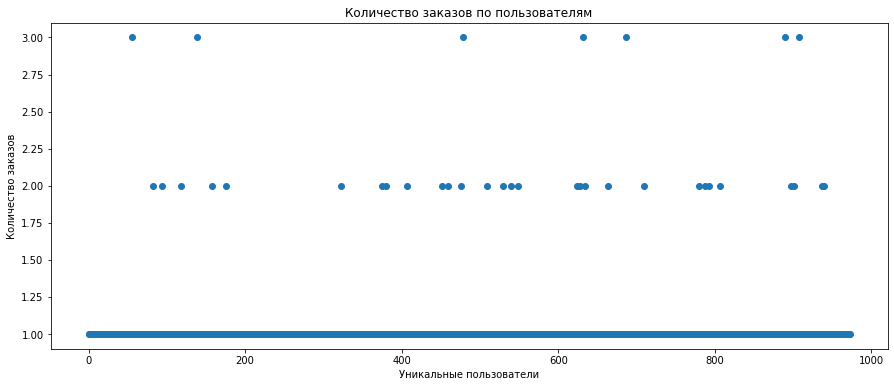

In [34]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(15, 6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Уникальные пользователи')
plt.ylabel('Количество заказов')
plt.show()

Имеем чуть более 1000 пользователей, количество заказов которых редко когда превышает 2-3. То есть пользователи, которые сделали заказ более 3 раз вполне могут быть аномальными. Чтобы окончательно с этим разобраться, необходимо посчитать выборочные перцентили.

# 2.7 Считаем 95-й и 99-й перцентили количества заказов на пользователя

In [35]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Итак, 95-й прецентиль соответствует значению одного заказа, что говорит нам о том, что лишь оставшиеся 5% пользователей совершили большее количество заказов, чем 1. 99-й перцентиль соответствует значению 2. Получается, всего 1% пользователей заказывали более 2 раз. 
Примем за верхнюю границу числа заказов значение 95-го перцентиля и в дальнейшем отсеим пользователей, которые заказали больше одного раза.

# 2.8 Точечный график стоимостей заказов

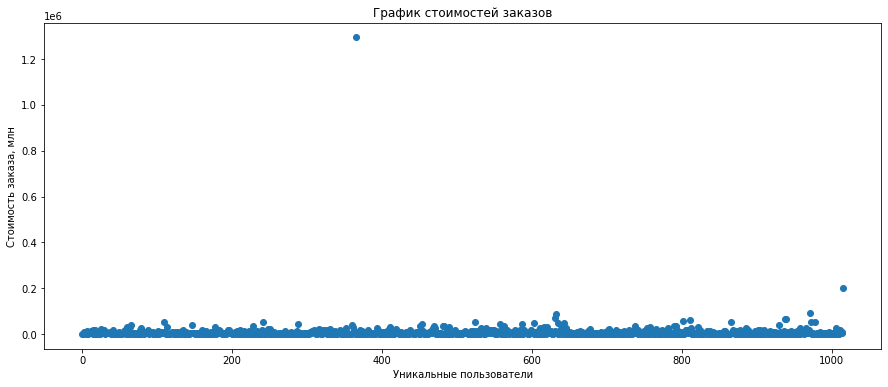

In [36]:
plt.figure(figsize=(15, 6))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('Уникальные пользователи')
plt.ylabel('Стоимость заказа, млн')
plt.show()

На точечном графике стоимостей заказов можно увидеть, что основное количество заказов имеет стоимость ниже 0.1 от 1е6. Из-за одного крупного выброса в данных оси графика оказались подписаны крайне неудобно, их сложно воспринимать. Скорее всего, это значение соответствует 100 тысячам и это число является одной десятой от числа 1е6, то есть от миллиона. Вглянем на ту же диаграмму рассеяния в другом расширении.

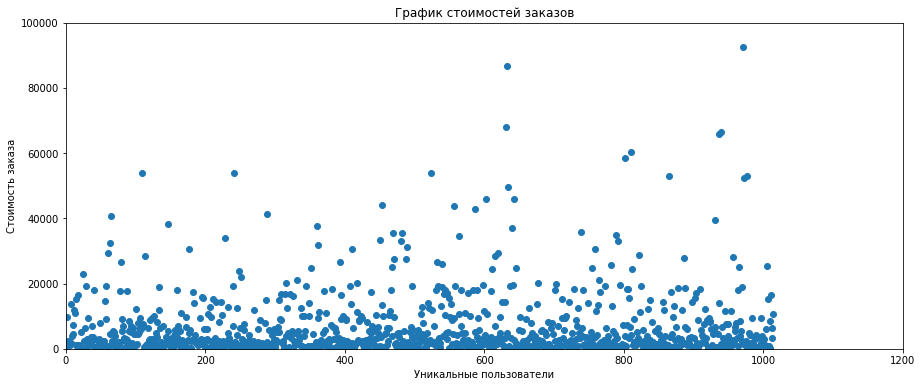

In [37]:
plt.figure(figsize=(15, 6))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1200, 0, 100000])
plt.title('График стоимостей заказов')
plt.xlabel('Уникальные пользователи')
plt.ylabel('Стоимость заказа')
plt.show()

Такой график гораздо удобнее воспринимать и на его основе можно сделать вывод о том, что чаще всего стоимость заказа не превышает 10000, а основное количество всех заказов не выходит за пределы 30-40 тысяч. Проверим, так ли это с помощью перцентилей. 

# 2.9 Считаем 95-й и 99-й перцентили для стоимости заказа

In [38]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


95-й перцентиль соответствует значению в 26785, что говорит о том, что 95 процентов пользователей тратят на один заказ до 26785, а 99-й перцентиль — это 53904. Всего 1% процент пользователей выходит из такого лимита в стоимости заказа. Будем считать выбросами значения, превышающие 95-й перцентиль, возьмём за верхнюю границу стоимость заказа в 26785.

# 2.10 Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным.

Пришло время сформулировать гипотезы: Нулевая: различий в среднем количестве заказов между группами A и B нет. Альтернативная: различия в среднем между группами A и B есть.
Начнём с подготовки данных.

In [39]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# в таблице data соединим данные из таблиц ordersADaily, ordersBDaily, ordersACummulative, ordersBCummulative,
# visitorsADaily, visitorsBDaily, visitorsACummulative и visitorsBCummulative

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# У нас получилась довольно большая таблица с приличным количеством столбцов. Ознакомимся с ней:
display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами 'userId' и 'orders', где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов, а ещё создадим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.

In [40]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [41]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [42]:
print("p-value для сравнения среднего количества заказов между группами: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

p-value для сравнения среднего количества заказов между группами: 0.01102


In [43]:
print(
    "Относительное различие в среднем между группами: {0:.3f}".format(
        (data['ordersPerDateB'].sum() / data['visitorsPerDateB'].sum())
        / (data['ordersPerDateA'].sum() / data['visitorsPerDateA'].sum())
        - 1
    )
)

Относительное различие в среднем между группами: 0.160


 Мы вынуждены отвергнуть нулевую гипотезу, потому как p-value значительно меньше 0.05, то есть на основе анализа «сырых данных» мы смело можем утверждать, что в среднем количестве заказов между группами есть статистически значимые различия. А относительный прирост среднего группы B к конверсии группы A равен 16 %

# 2.11 Статистическая значимость различия средних чеков между группами

In [44]:
print(
    "p-value для сравнения средних чеков между группами: {0:.3f}".format(
        stats.mannwhitneyu(
            orders[orders['group'] == 'A']['revenue'],
            orders[orders['group'] == 'B']['revenue'],
        )[1]
    )
)

p-value для сравнения средних чеков между группами: 0.829


In [45]:
print(
    "Относительный прирост среднего чека группы B: {0:.3f}".format(
        orders[orders['group'] == 'B']['revenue'].mean()
        / orders[orders['group'] == 'A']['revenue'].mean()
        - 1
    )
)

Относительный прирост среднего чека группы B: 0.287


 p-value больше 0.05 — статистически значимых различий в среднем чеке между группами нет. Наблюдаемое различие в 28,7 % не является статистически значимым. Имеет смысл перейти к анализу аномалий для того, чтобы сделать окончательные выводы.

# 2.12 Статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным. 

Перейдём к подготовке очищенных от аномалий данных.

Вспомним, что 95-й и 99-й перцентили средних чеков равны 26785 и 53904. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 1 и 2 заказам на пользователя, соответственно.

Примем за аномальных пользователей тех, кто совершил 2 заказа и более, или совершил заказ на сумму свыше 26785. Так мы сможем убрать 5% пользователей с наибольшим числом заказов и от 5% заказов с наибольшей стоимостью.
Удалять будем именно пользователей — сначала определим аномальные заказы. Затем пользователей, совершивших их, и добавим их в список аномальных.
Сделаем срезы пользователей с числом заказов больше 1 — usersWithManyOrders и пользователей, совершивших заказы дороже 26785 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers, удалим дубликаты и отсортируем по возрастанию. Звучит как план.

In [46]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [47]:
# Проверим, что таблица abnormalUsers соответствует ожиданиям
display(abnormalUsers.head(10))

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
648     382846391
51      406208401
67      522292794
58      611059232
Name: userId, dtype: int64

В переменной abnormalUsers содержатся аномальные пользователи. Удалим их и посчитаем статистическую значимость и проверим, есть ли существенные различия между группами с очищенными данными. Для того, чтобы посчитать статистическую значимость различия среднего количества заказов после удаления аномальных пользователей, создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним  очищенные данные о заказах — не включая аномальных пользователей.

In [48]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [49]:
print(
    ' p-value сравнения среднего между очищенными группами: {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
)

 p-value сравнения среднего между очищенными группами: 0.01593


In [50]:
print('Относительный прирост среднего очищенной группы B: {0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

Относительный прирост среднего очищенной группы B: 0.174


Как и в случае с «сырыми» данными, мы вынуждены отвергнуть нулевую гипотезу, потому как p-value значительно меньше 0.05, то есть на основе анализа «очищенных» данных мы смело можем утверждать, что в среднем количестве заказов между группами есть статистически значимые различия. А относительный прирост среднего группы B к конверсии группы A равен 17,4 %, что ещё раз подтверждает то, что сегмент B значительно лучше сегмента A.

# 2.13 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [51]:
print(
    'p-value для сравнения средних чеков между очищенными группами: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)


p-value для сравнения средних чеков между очищенными группами: 0.727


In [52]:
print(
    'Относительный прирост среднего чека очищенной группы B: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Относительный прирост среднего чека очищенной группы B: -0.034


Как и в случае с сырыми данными, p-value больше 0.05 — отклонить нулевую гипотезу и признать статистически значимые различий в среднем чеке между группами мы не можем. Относительное различие среднего чека между сегментами стало отрицательным и теперь составляет -3%, то есть здесь мы говорим не об относительном приросте, а об относительной убыли в 3 процента среднего чека очищенной группы B.

# 2.14 Принимаем решение по результатам теста

Выводы по результатам A/B-теста: 
    
- Статистически значимые различия в среднем количестве заказов между группами как по «сырым», так и по «очищенным» данным достигнуты. После фильтрации аномалий относительные различия между группами в количестве заказов выросли с показателя 16% до 17.3%

- И по «сырым» и по «очищенным» данным нет статистически значимого различия по среднему чеку между группами. Фильтрация аномалий лишь усилила показатель p-value. 

- Если по «сырым» данным мы считали, что относительный прирост среднего чека группы B составляет 28.7%, то по очищенным данным этот показатель принял отрицательное значение, то есть мы получили относительную убыль в 3 процента среднего чека группы B относительно группы A.

Принимаем решение остановить тест, признаём его успешным и переходим к проверке следующей гипотезы.